In [1]:
import importlib
import dbops
import numpy as np
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import glob

In [4]:
importlib.reload(dbops)  # Reload the module from source

<module 'dbops' from '/scratch/u1319464/Data-Mining-Spring-2025-Project/dbops.py'>

In [5]:
for movie_ref in dbops.Movie.iterate_all_movies():
    imdb_id = movie_ref.get_imdb_id()
    title = movie_ref.get_title()
    frame_idx_timeline = []
    num_faces_timeline = []
    color_timeline = []
    emotion_timeline = []
    for frame_ref in tqdm(movie_ref.iterate_frames()):
        # if not frame_ref.is_fully_cached():
        #     print(f'Uncached frame found: {frame_ref.frame_index}')
        
        frame_idx_timeline.append(frame_ref.frame_index)
        try:
            num_faces_timeline.append(frame_ref.get_num_faces())
        except:
            num_faces_timeline.append(0)
        
        c = frame_ref.get_average_color()
        color_timeline.append(c)

        frame_emotions = []
        for face_ref in frame_ref.iterate_faces():
            frame_emotions.append(face_ref.get_emotion_embedding())
        
        emotion_timeline.append(frame_emotions)

    break

color_timeline = np.array(color_timeline)


100%|████████████████████████████████████████████████████████████████████████████████████████| 13225/13225 [01:27<00:00, 151.42it/s]


In [6]:
np.array(color_timeline)

array([[ 80.35585612,  65.66894857,  31.18209961],
       [ 80.72046875,  65.96075846,  31.61356771],
       [ 80.70820638,  65.92733724,  31.52018229],
       ...,
       [ 74.76169922,  79.71999023,  50.77975586],
       [ 64.8017806 ,  45.52239909,  23.14770508],
       [108.0254069 ,  17.82145182,   1.04323568]])

Text(0.5, 1.0, 'Overall Processing Progress of "The Bishop\'s Wife"')

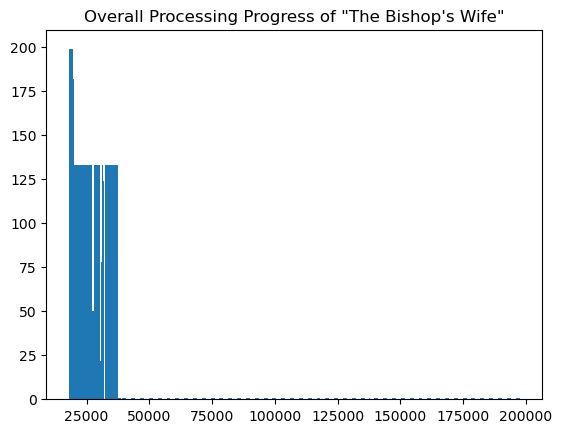

In [7]:
plt.hist(
    frame_idx_timeline,
    bins=15*60 # for every interval of ~15 seconds
)
plt.title(f'Overall Processing Progress of "{title}"')

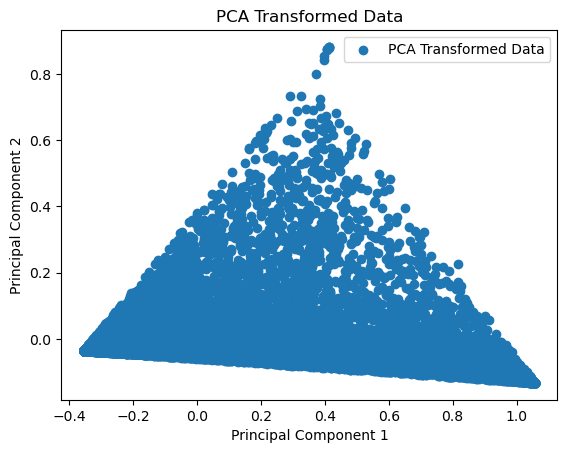

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Sample data
X = np.concatenate([ np.stack(j) for j in emotion_timeline if not len(j)==0 ])

# Initialize PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], label='PCA Transformed Data')
plt.title('PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.show()

/tmp/ipykernel_492008/734043573.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='viridis')


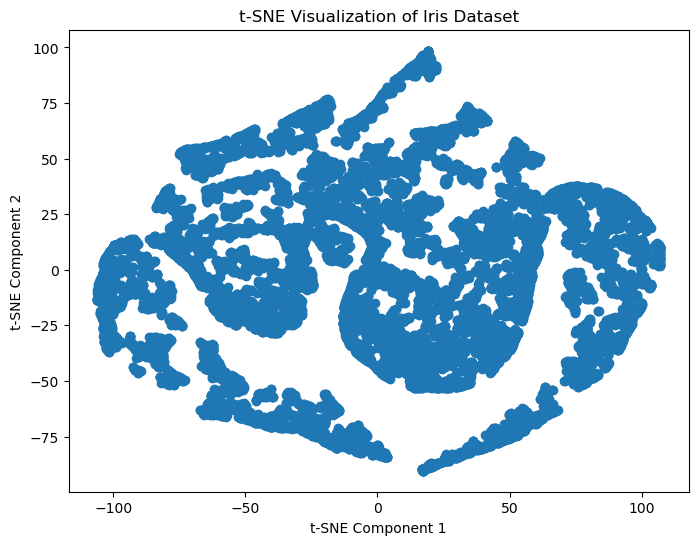

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Step 2: Apply t-SNE to reduce dimensions to 2
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Step 3: Plot the results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='viridis')

# plt.colorbar(scatter, ticks=range(len(), label='Species')
plt.title('t-SNE Visualization of Emotional Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [30]:
X.shape

(14316, 7)

In [25]:


np.concatenate([ np.stack(j) for j in emotion_timeline if not len(j)==0 ]).shape



(14316, 7)